#importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv('new.csv', encoding='latin1') 


In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4740,ham,Many more happy returns of the day. I wish you...,NaN,NaN,NaN
1394,ham,R we still meeting 4 dinner tonight?,NaN,NaN,NaN
4730,ham,K:)eng rocking in ashes:),NaN,NaN,NaN
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN
3216,ham,Come to mahal bus stop.. &lt;DECIMAL&gt;,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

## 1. Data cleaning
## 2. EDA
## 3. Text Preprocessing



***********************************

# 1. Data cleaning


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)


,v1,v2
2334,ham,Do you like Italian food?
2114,spam,Sunshine Hols. To claim ur med holiday send a ...
5064,ham,But your brother transfered only &lt;#&gt; +...
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
1727,ham,I went to project centre


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
3547,ham,Single line with a big meaning::::: \Miss anyt...
1770,ham,Dont show yourself. How far. Put new pictures ...
4049,ham,Ok ok take care. I can understand.
3783,ham,Dear got train and seat mine lower seat
2994,ham,Mm not entirely sure i understood that text bu...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()


np.int64(403)

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()


np.int64(0)

##2.EDA

In [16]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

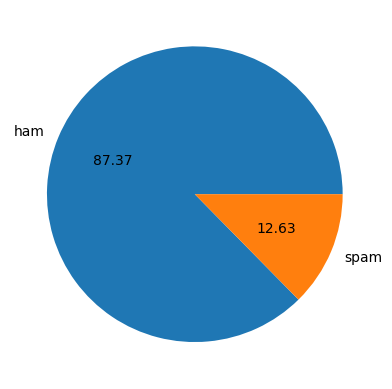

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is imbalanced


In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# Basic tokenization by whitespace
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [22]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [23]:
# Approximate sentence splitting based on periods
df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))


In [24]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [26]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [28]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

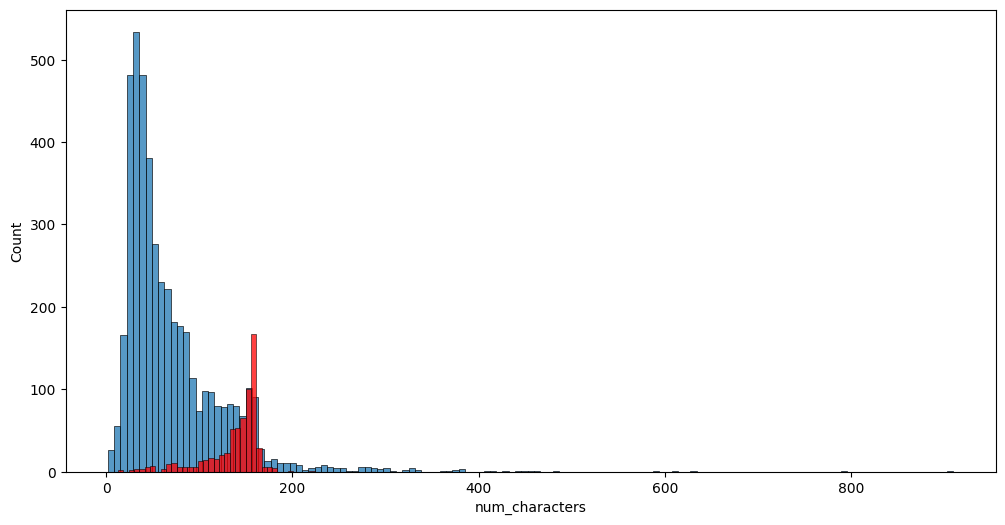

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

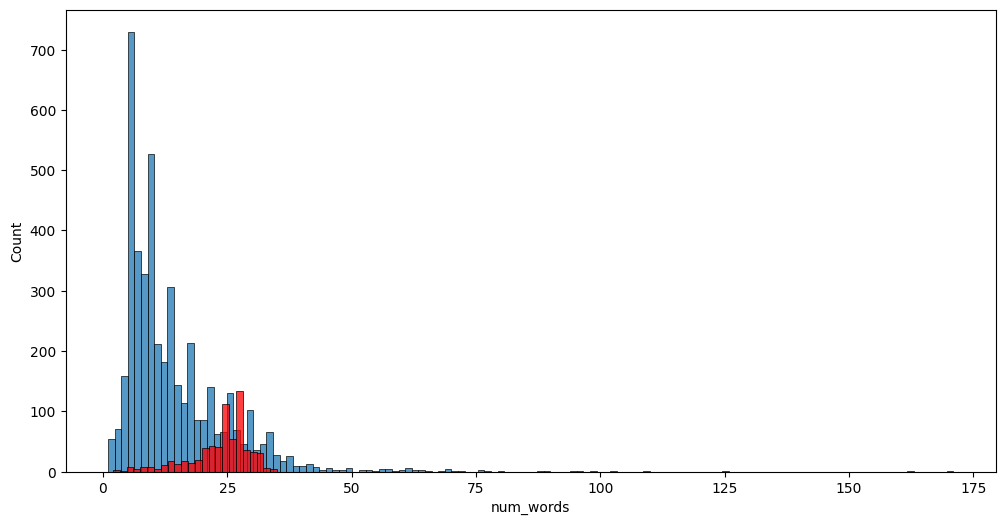

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


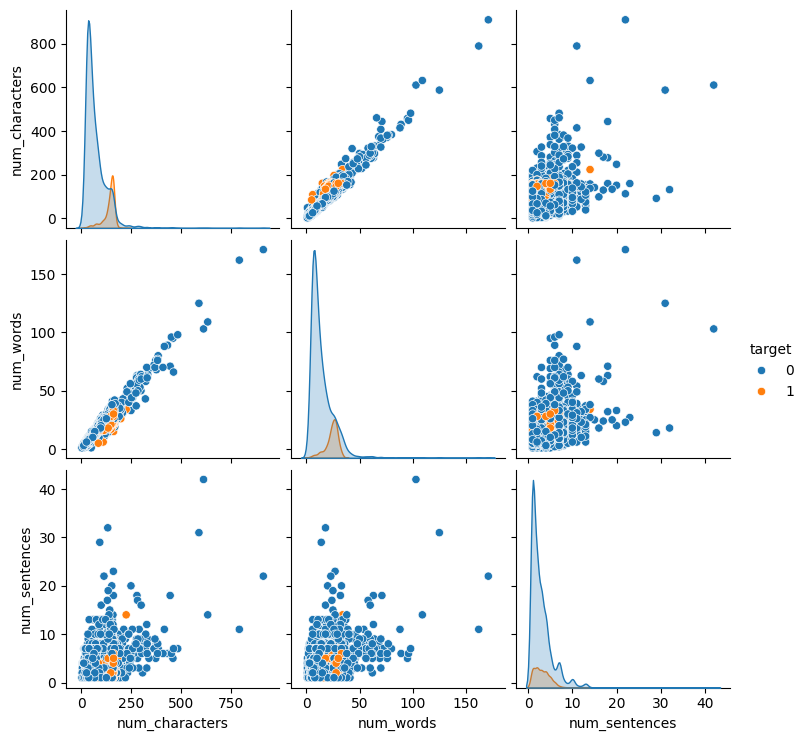

In [31]:
sns.pairplot(df,hue='target')


In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


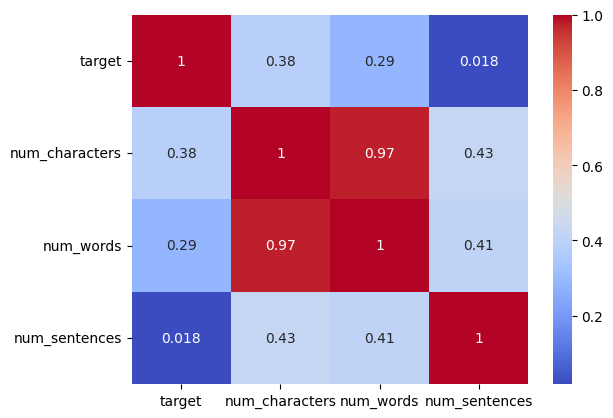

In [33]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


##3. Data Preprocessing


In [34]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def transform_text_spacy(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Process the text using spaCy to get a Doc object
    doc = nlp(text)
    
    # Extract tokens (words) and filter out any stop words or punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    
    return " ".join(tokens)



In [35]:
# Example usage:
text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_text = transform_text_spacy(text)
print(transformed_text)


gon na home soon want talk stuff anymore tonight k cried today


In [36]:
df['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [38]:
# Directly loop over the DataFrame
df['transformed_text'] = [transform_text_spacy(text) for text in df['text']]


In [39]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goes usf lives


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


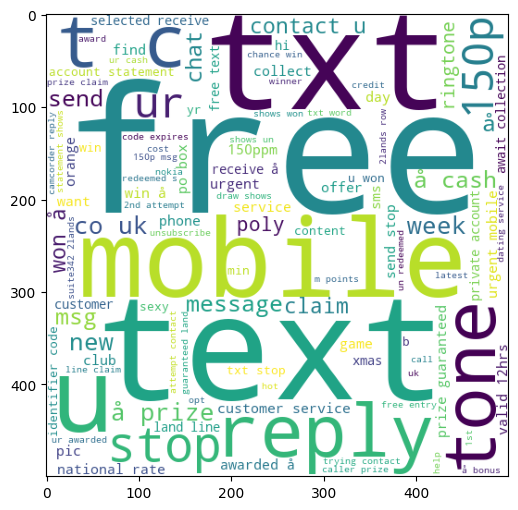

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


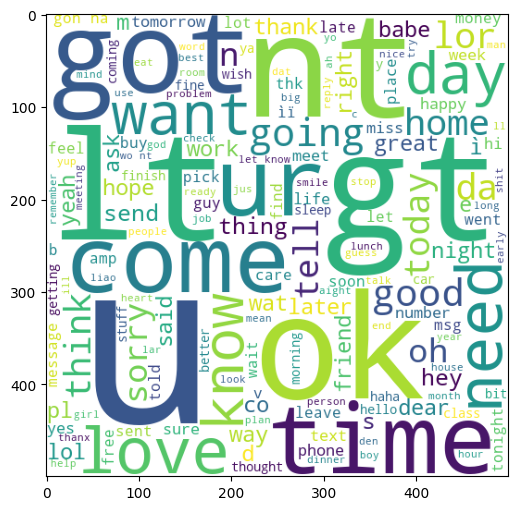

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goes usf lives


In [46]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [47]:
len(spam_corpus)


10498

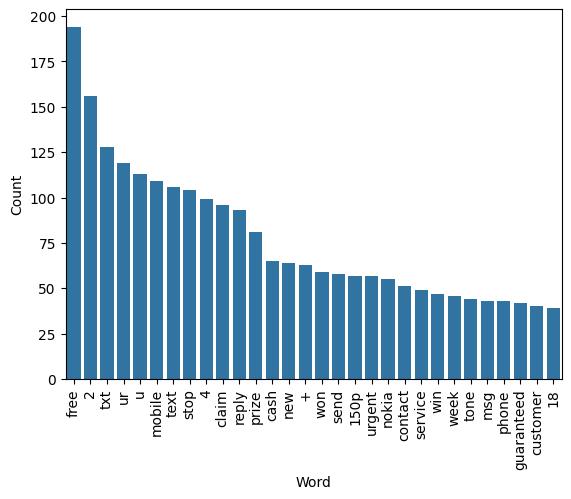

In [48]:
from collections import Counter
# Assuming spam_corpus is a list or iterable containing the words
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the barplot
sns.barplot(data=data, x='Word', y='Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.show()
